## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Load the Data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
# Check null values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Categorical features
columns = (data.dtypes == 'object')
object_cols = list(columns[columns].index)
print('Categorical variables:')
print(object_cols)

Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [7]:
# The feature "TotalCharges" is in the wrong format, let's solve this
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [8]:
# Statistical resume
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [9]:
# More imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

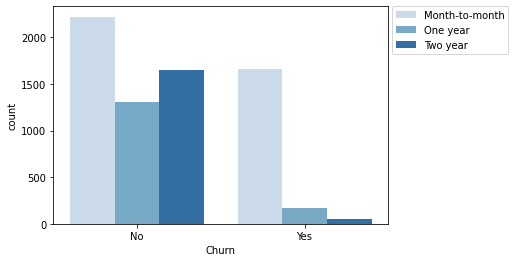

In [10]:
# Let's explore the data
sns.countplot(x='Churn',data=data,hue='Contract',palette='Blues')
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0)

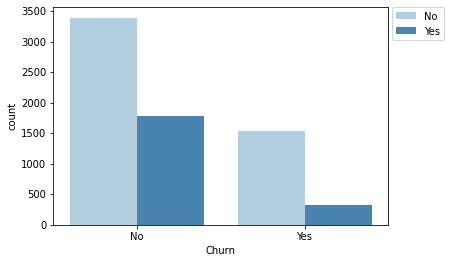

In [11]:
sns.countplot(x='Churn',data=data,hue='Dependents',palette='Blues')
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0)

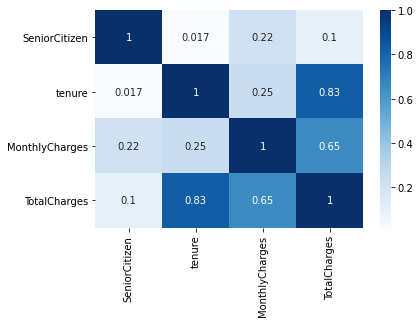

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

## Modeling the data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


## Spliting and Creating a NN model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [17]:
X = data.drop('Churn',axis=1).values
y = data['Churn'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model = Sequential()

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 4930 samples, validate on 2113 samples
Epoch 1/250
4930/4930 [==============================] - 1s 184us/sample - loss: 0.5911 - accuracy: 0.7225 - val_loss: 0.5538 - val_accuracy: 0.7283
Epoch 2/250
4930/4930 [==============================] - 0s 78us/sample - loss: 0.5685 - accuracy: 0.7355 - val_loss: 0.5367 - val_accuracy: 0.7283
Epoch 3/250
4930/4930 [==============================] - 0s 98us/sample - loss: 0.5529 - accuracy: 0.7371 - val_loss: 0.5231 - val_accuracy: 0.7283
Epoch 4/250
4930/4930 [==============================] - 1s 105us/sample - loss: 0.5407 - accuracy: 0.7377 - val_loss: 0.5108 - val_accuracy: 0.7283
Epoch 5/250
4930/4930 [==============================] - 0s 80us/sample - loss: 0.5382 - accuracy: 0.7389 - val_loss: 0.5029 - val_accuracy: 0.7283
Epoch 6/250
4930/4930 [==============================] - 0s 80us/sample - loss: 0.5260 - accuracy: 0.7373 - val_loss: 0.4954 - val_accuracy: 0.7283
Epoch 7/250
4930/4930 [==============================] - 0s 84

Epoch 110/250
4930/4930 [==============================] - 0s 78us/sample - loss: 0.4340 - accuracy: 0.7976 - val_loss: 0.4166 - val_accuracy: 0.8055
Epoch 111/250
4930/4930 [==============================] - 0s 77us/sample - loss: 0.4356 - accuracy: 0.7907 - val_loss: 0.4156 - val_accuracy: 0.8083
Epoch 112/250
4930/4930 [==============================] - 0s 76us/sample - loss: 0.4357 - accuracy: 0.7905 - val_loss: 0.4153 - val_accuracy: 0.8074
Epoch 113/250
4930/4930 [==============================] - 0s 75us/sample - loss: 0.4379 - accuracy: 0.7842 - val_loss: 0.4168 - val_accuracy: 0.8074
Epoch 114/250
4930/4930 [==============================] - 0s 76us/sample - loss: 0.4385 - accuracy: 0.7886 - val_loss: 0.4158 - val_accuracy: 0.8069
Epoch 115/250
4930/4930 [==============================] - 0s 77us/sample - loss: 0.4356 - accuracy: 0.7927 - val_loss: 0.4154 - val_accuracy: 0.8055
Epoch 116/250
4930/4930 [==============================] - 0s 77us/sample - loss: 0.4360 - accuracy:

Epoch 219/250
4930/4930 [==============================] - 0s 77us/sample - loss: 0.4253 - accuracy: 0.7961 - val_loss: 0.4128 - val_accuracy: 0.8074
Epoch 220/250
4930/4930 [==============================] - 0s 76us/sample - loss: 0.4261 - accuracy: 0.7943 - val_loss: 0.4140 - val_accuracy: 0.8074
Epoch 221/250
4930/4930 [==============================] - 0s 79us/sample - loss: 0.4257 - accuracy: 0.7947 - val_loss: 0.4128 - val_accuracy: 0.8088
Epoch 222/250
4930/4930 [==============================] - 0s 76us/sample - loss: 0.4251 - accuracy: 0.7980 - val_loss: 0.4134 - val_accuracy: 0.8074
Epoch 223/250
4930/4930 [==============================] - 0s 75us/sample - loss: 0.4294 - accuracy: 0.7957 - val_loss: 0.4142 - val_accuracy: 0.8083
Epoch 224/250
4930/4930 [==============================] - 0s 76us/sample - loss: 0.4302 - accuracy: 0.7937 - val_loss: 0.4131 - val_accuracy: 0.8060
Epoch 225/250
4930/4930 [==============================] - 0s 77us/sample - loss: 0.4284 - accuracy:

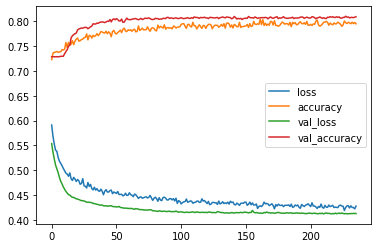

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# These plots show us a good fit of our model to the data

In [33]:
predictions = model.predict_classes(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [51]:
accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Test Loss:',round(accuracy[0],3))
print('Test Accuracy:',round(accuracy[1],3))

Test Loss: 0.413
Test Accuracy: 0.809


In [ ]:
# Our model was good to explain loyal customers.